<a href="https://colab.research.google.com/github/MikeDeecode/Campus-placement-project/blob/master/school_placement_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MBA STUDENTS PLACEMENT AT THE JAIN UNIVERSITY BANGALORE** 

# Exploratory Analysis and Machine Learning on the Campus Placement Data



*   Exploratory Data Analysis
*   Visualisation of analysed data 
*   Determining the characteristics affecting placement and salary
*   Insights from the data

Ride along.







###**Description of the dataset**

The dataset used for this project contains the data of students from **Jain University Bangalore**

There are 215 rows and 15 columns in this dataset 

The columns contained in the dataset are as follows:


*   **sl_mo** - Serial number or index of the rows
*   **gender** - Sex of the students in the dataset
*   **ssc_p** - Secondary school percentage
*   **ssc_b** - Secondary school board
*   **hsc_p** - Higher secondary school percentage
*   **hsc_b** - Higher secondary school board
*   **hsc_s** - Higher secondary school specialisation
*   **degree_p** - Degree percentage
*   **degree_t** - Degree type
*   **workex** - Work experience
*   **etest_p** - Employability test percentage
*   **specialisation** - MBA specialisation
*   **mba_p** - MBA percentage
*   **status** - Student's status(Placed or Not placed)
*   **salary** - Salary expectation of students 


##**EXPLORATORY ANALYSIS (GETTINNG INSIGHTS AND DETERMINING FEATURES FROM THE DATA)**

Import the needed libraries to perform out analysis

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

print("Setup complete")

Setup complete


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import the dataset

In [2]:
pment = pd.read_csv("/content/Placement_Data_(viz).csv", index_col = 0)
print ("Successful")

Successful


Obtaining a brief description of the datasets

In [3]:
pment.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
pment.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


The above data shows salary data in different percentiles 

In [5]:
pment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


OBSERVATION



*   The salary column has some missing values
*   Looking at the dataset again I observed that students who have not been placed do not have salarie as shown below
*   There are 67 missing values

In [6]:
salary_by_status = pment.groupby('status', as_index = False)['salary'].sum()
salary_by_status.rename(columns = {'salary': 'Total salary'}, inplace = True)
salary_by_status

,status,Total salary
0,Not Placed,0.0
1,Placed,42721000.0


## **EXPLORING DATA BY FEATURES**

###GENDER

**NUMBER OF MALE AND FEMALE STUDENTS**

In [7]:
pment['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

There are 138 male students and 76 female students 

**PERCENTAGE OF MALE AND FEMALE STUDENTS**

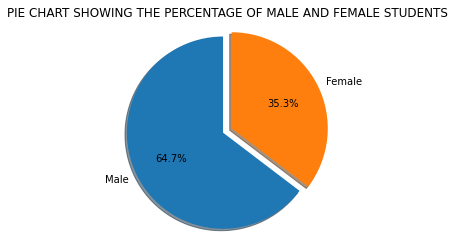

In [8]:
labels = 'Male', 'Female'
sizes = [139, 76]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.title("PIE CHART SHOWING THE PERCENTAGE OF MALE AND FEMALE STUDENTS")
plt.show()



*   64.7% of the students are male 
*   35.3% of the students are female



In [9]:
print("NUMBERS BY STATUS")
pment['status'].value_counts()

NUMBERS BY STATUS


Placed        148
Not Placed     67
Name: status, dtype: int64

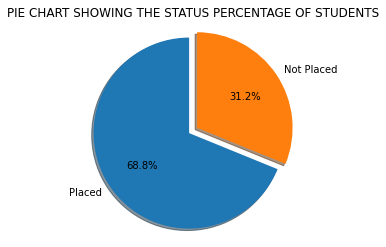

In [10]:
labels = 'Placed', 'Not Placed'
sizes = [148, 67]
explode = (0, 0.1)

fig1,ax2 = plt.subplots()
ax2.pie(sizes, labels = labels, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax2.axis('equal')
plt.title("PIE CHART SHOWING THE STATUS PERCENTAGE OF STUDENTS")
plt.show()

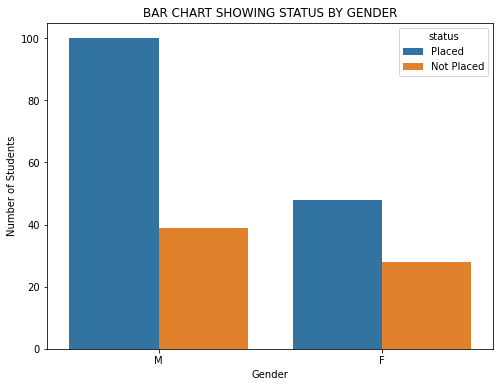

In [11]:
plt.figure(figsize =(8, 6))
sns.countplot('gender', hue = 'status', data = pment)
plt.title("BAR CHART SHOWING STATUS BY GENDER")
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()

OBSERVATION

*   there are more men than women who are placed 
*   There are also more men than women who are not placed 
*   This seems normal because there are more men than women in the data set

**HOW GENDER AFFECTS SALARY**

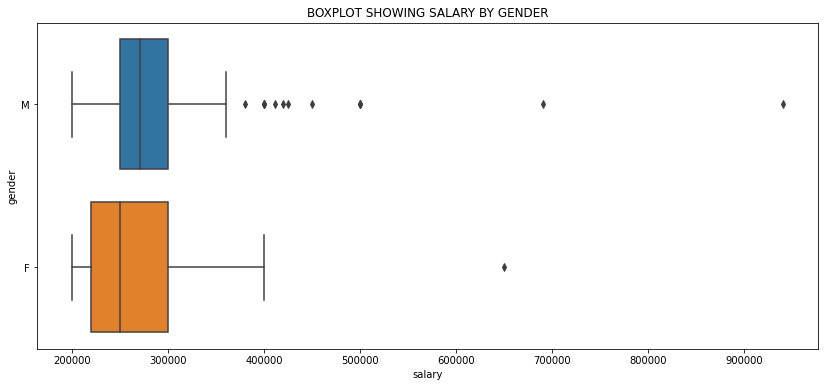

In [12]:
plt.figure(figsize = (14, 6))
sns.boxplot('salary', 'gender', data = pment)
plt.title("BOXPLOT SHOWING SALARY BY GENDER")
plt.show()

OBSERVATION

*   Generally, the male students earn higher than the female students 

CONCLUSION

* We can conclude that gender affects placement and salaty of the students

###SECONDARY EDUCATION PERCENTAGE (ssc_p) AND SECONDARY EDUCATION BOARD (ssc_b)



**NUMBER OF STUDENTS IN EACH SECONDARY EDUCATION BOARD**

In [13]:
pment['ssc_b'].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

* There are 116 students from the Central board 
* There are 99 students from other boards

**PERCENTAGE OF STUDENTS FROM EACH SECONDARY EDUCATION BOARD**

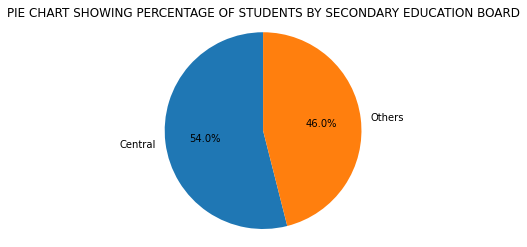

In [14]:
labels = 'Central', 'Others'
sizes  =[116, 99]

fig2, ax2 = plt.subplots()
ax2.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 90)
ax2.axis('equal')
plt.title("PIE CHART SHOWING PERCENTAGE OF STUDENTS BY SECONDARY EDUCATION BOARD")
plt.show()

* 54% of the students are from the Central Secondary education board 
* 46% of the students are from Other secondary ediucation boards

**STATUS OF STUDENTS BY SECONDARY EDUCATION PERCENTAGE**

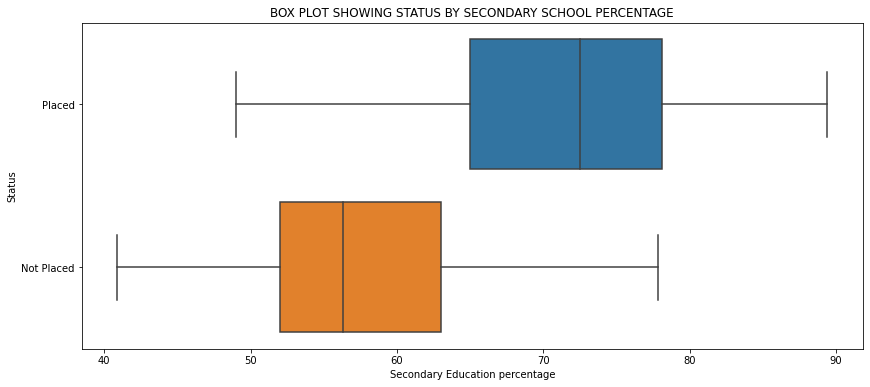

In [15]:
plt.figure(figsize = (14, 6))
sns.boxplot('ssc_p', 'status', data = pment)
plt.xlabel("Secondary Education percentage")
plt.ylabel("Status")
plt.title("BOX PLOT SHOWING STATUS BY SECONDARY SCHOOL PERCENTAGE")
plt.show()

* Students with higher Secondary education percentage get placed faster

**HOW SECONDARY EDUCATION BOARD AFFECTS STATUS**

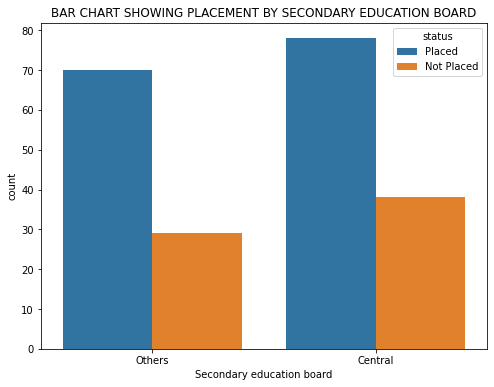

In [16]:
plt.figure(figsize = (8, 6))
sns.countplot('ssc_b', hue = 'status', data = pment)
plt.title("BAR CHART SHOWING PLACEMENT BY SECONDARY EDUCATION BOARD")
plt.xlabel("Secondary education board")
plt.show()

* Secondary education board dosent seem to have an effect on the placement of students 

**HOW SECNDARY EDUCATION PERCENTAGE AND BOARD AFFECTS SALARY**

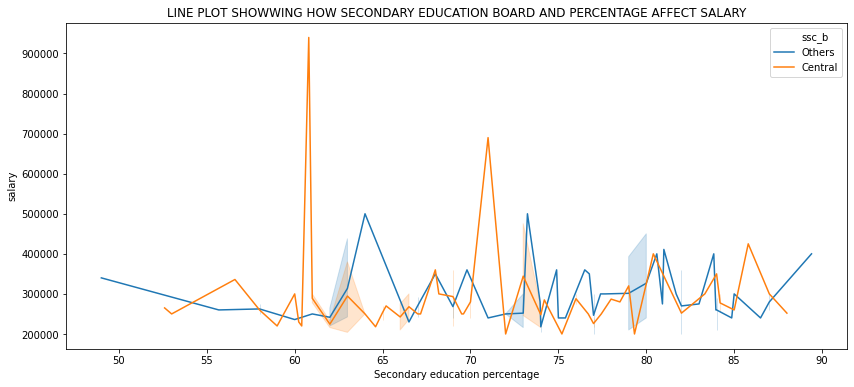

In [17]:
plt.figure(figsize = (14, 6))
sns.lineplot('ssc_p', 'salary', hue = 'ssc_b', data = pment)
plt.xlabel("Secondary education percentage")
plt.title("LINE PLOT SHOWWING HOW SECONDARY EDUCATION BOARD AND PERCENTAGE AFFECT SALARY")
plt.show()

* According to the plot, there is no relationship between secondary school board and salary but the students from Central board earn higher 
* There is also no relationship between secondary school percentage and salary but 

###HIGHER SECONDARY SCHHOL PERVENTAGE(hsc_p), HIGHER SECONDARY SCHOOL BOARD (hsc_b) AND HIGHER SECONDARY SCHOOL SPECIALSATION (hsc_s)

**NUMBER OF STUDENTS BY HIGHER SECONDARY EDUCATION BOARD AND SPECIALISATION**

Higher Secondary education board

In [18]:
pment['hsc_b'].value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

* There are 131 students from other boards 
* There are 84 students from Central board

Higher Secondary education specialisation

In [19]:
pment['hsc_s'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

* There were 113 students in Commerve which is the highest
* There were 91 students in Science
* There were 11 students in Arts

**HOW HIGHER SECONDARY EDUCATION BOARD AFFECTS SALARY**

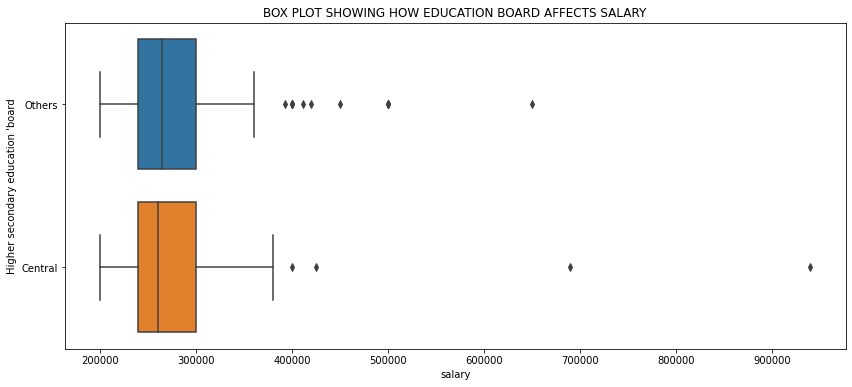

In [20]:
plt.figure(figsize = (14, 6))
sns.boxplot('salary', 'hsc_b', data = pment)
plt.title("BOX PLOT SHOWING HOW EDUCATION BOARD AFFECTS SALARY")
plt.ylabel("Higher secondary education 'board")
plt.show()

* It does not affect the salary much
* Students from the Cenral board get the highest paying jobs

**HOW HIGHER SECONDARY EDUCATION BOARD AFFECTS PLACEMENT**

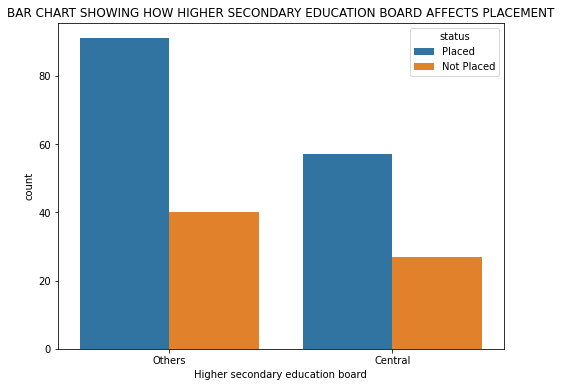

In [21]:
plt.figure(figsize = (8, 6))
sns.countplot('hsc_b', hue = 'status', data = pment)
plt.xlabel("Higher secondary education board")
plt.title("BAR CHART SHOWING HOW HIGHER SECONDARY EDUCATION BOARD AFFECTS PLACEMENT")
plt.show()

* Students from other boards are better placed than students from Central board 

**HOW HIGHER SECONDARY EDUCATION SPECIALISATION AFFECTS SALARY AND STATUS**

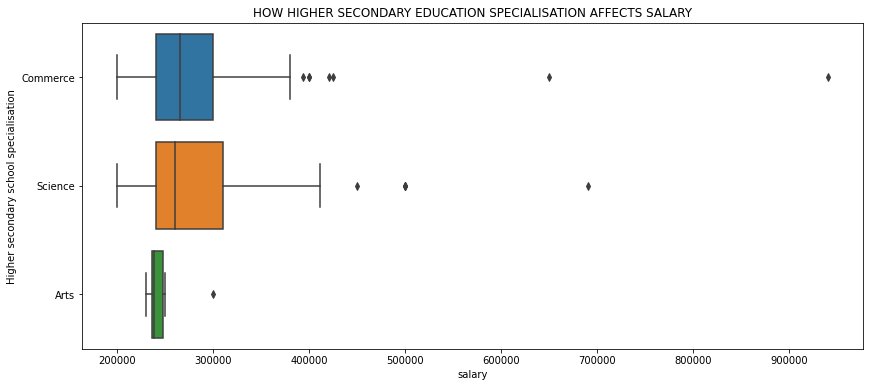

In [22]:
plt.figure(figsize = (14, 6))
sns.boxplot('salary', 'hsc_s', data = pment)
plt.title("HOW HIGHER SECONDARY EDUCATION SPECIALISATION AFFECTS SALARY")
plt.ylabel("Higher secondary school specialisation")
plt.show()

* Students who specilise in sciences are paid highlhy on average hut students who specialise in commerce get the highest paying jobs 
* Students who specialise in arts are paid low salary on average and also get the lowest paying jobs

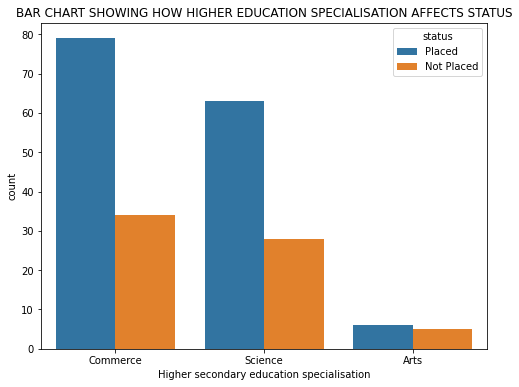

In [23]:
plt.figure(figsize = (8, 6))
sns.countplot('hsc_s', hue = 'status', data = pment)
plt.xlabel("Higher secondary education specialisation")
plt.title('BAR CHART SHOWING HOW HIGHER EDUCATION SPECIALISATION AFFECTS STATUS')
plt.show()

* As we can see, it does not have much of an effect on the status of students

**HOW HIGHER SECONDARY EDUCATION PERCENTAGE AFFECTS STATUS AND SALARY**

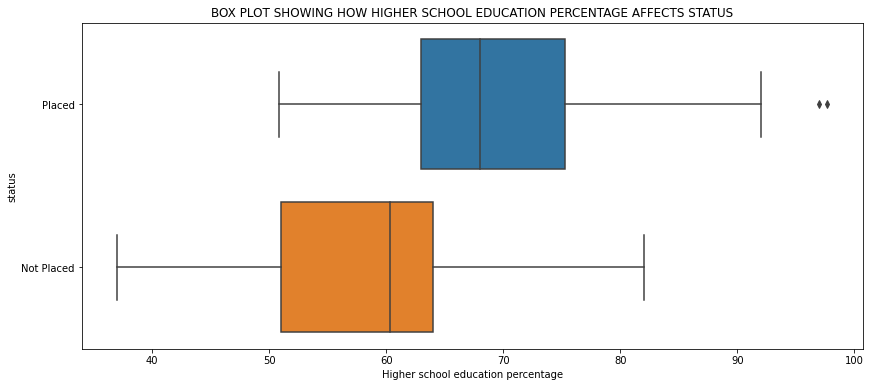

In [24]:
plt.figure(figsize = (14, 6))
sns.boxplot('hsc_p', 'status', data = pment)
plt.xlabel("Higher school education percentage")
plt.title("BOX PLOT SHOWING HOW HIGHER SCHOOL EDUCATION PERCENTAGE AFFECTS STATUS")
plt.show()

* Students whose Higher school education percentage is high are placed faster

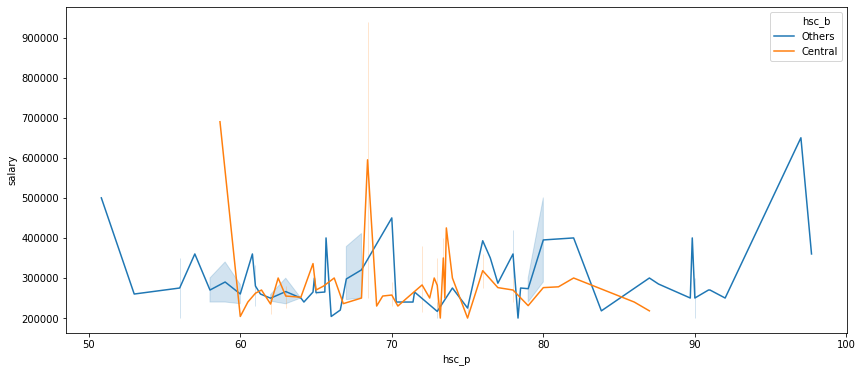

In [25]:
plt.figure(figsize = (14, 6))
sns.lineplot('hsc_p', 'salary', hue = 'hsc_b', data = pment)
plt.show()

* There is no specific relationship between the higher secondary education percentage and salary
* The higher secondary education board doesn't affect the salary also as confirmed before

INSIGHTS

* Higher secondary education board affects placement
* Higher secondary education specialisation affects salary
* Higher secondary education percentage affects status

###DEGREE PERCENTAGE (degree_t) AND DEGREE TYPE (degree_t)

In [26]:
pment['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

* 145 of the students had a degree in Communication and Management
* 89 of the students had a degree in Science and Technology
* 11 of the students had other degrees

**HOW DEGREE TYPE AFFECTS THE SALARY AND STATUS**

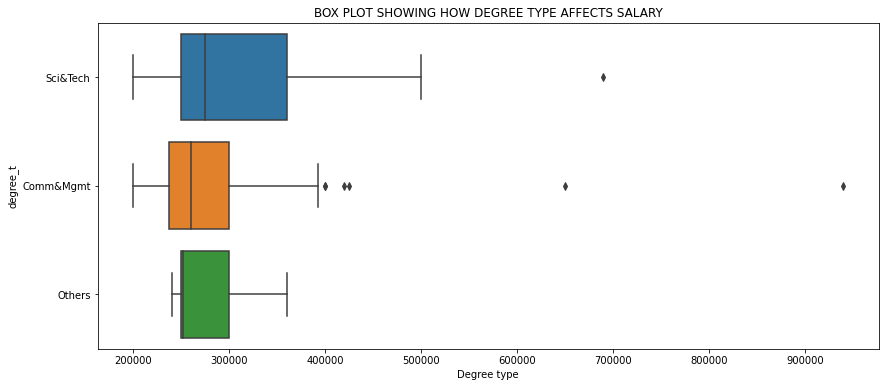

In [27]:
plt.figure(figsize = (14, 6))
sns.boxplot('salary', 'degree_t', data = pment)
plt.title("BOX PLOT SHOWING HOW DEGREE TYPE AFFECTS SALARY")
plt.xlabel("Degree type")
plt.show()

* Students who had a degree in Science and Technology had better jobs on average
* Students who had a degree in Communications and management had the highest paying jobs 
* Students who had other degrees earned the lowest 

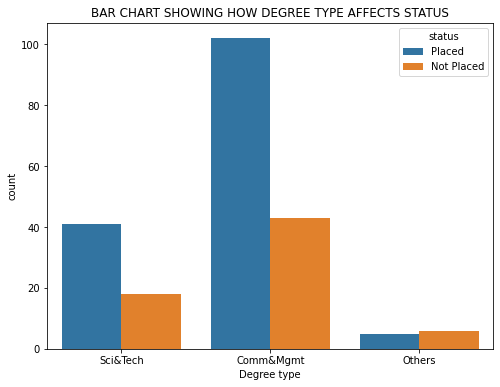

In [28]:
plt.figure(figsize = (8, 6))
sns.countplot('degree_t', hue = 'status', data = pment)
plt.xlabel("Degree type")
plt.title("BAR CHART SHOWING HOW DEGREE TYPE AFFECTS STATUS")
plt.show()

* Students who had a degrre in Comunications and Management got placed faster though they had the highest number of unplaced students 
* Students who had other degrees had the lowest placement rate 

**HOW DEGREE PERCENTAGE AFFECTS SALARY AND STATUS**

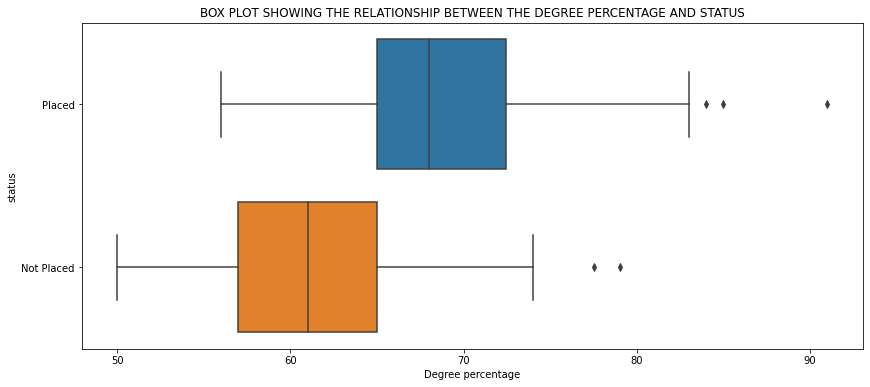

In [29]:
plt.figure(figsize = (14, 6))
sns.boxplot('degree_p', 'status', data = pment)
plt.title("BOX PLOT SHOWING THE RELATIONSHIP BETWEEN THE DEGREE PERCENTAGE AND STATUS")
plt.xlabel('Degree percentage')
plt.show()

* Students with higher degree percentage gpt placed faster 

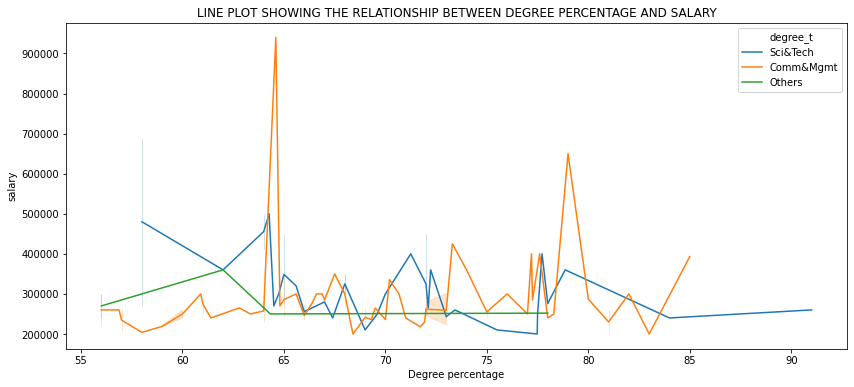

In [30]:
plt.figure(figsize = (14, 6))
sns.lineplot('degree_p', 'salary', hue = 'degree_t', data = pment)
plt.xlabel("Degree percentage")
plt.title("LINE PLOT SHOWING THE RELATIONSHIP BETWEEN DEGREE PERCENTAGE AND SALARY")
plt.show()

* Based on the diagram above, there is no relationship between degree percentage and salary 
* Students who had a degree in Communications and Management got the highest paying jobs as confirmed before 

###WORK EXPERIENCE

In [31]:
pment['workex'].value_counts()

No     141
Yes     74
Name: workex, dtype: int64

* There are 141 students without work experience 
* There are 74 students with work experience

**HOW WORK EXPERIENCE AFFECTS SALARY AND STATUS**

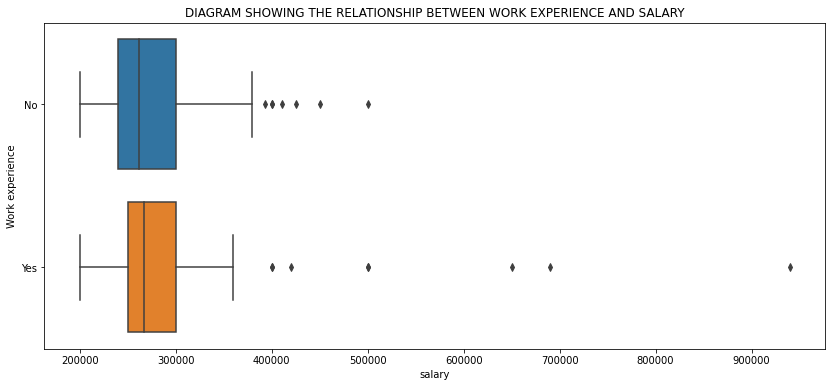

In [32]:
plt.figure(figsize = (14, 6))
sns.boxplot('salary', 'workex', data = pment)
plt.title("DIAGRAM SHOWING THE RELATIONSHIP BETWEEN WORK EXPERIENCE AND SALARY")
plt.ylabel("Work experience")
plt.show()

* A relationship is not evident but the students with work experience got the highest paying jobs

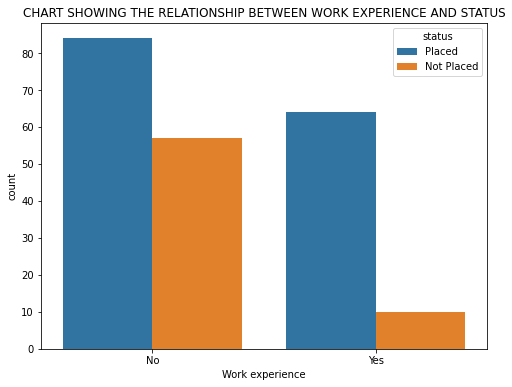

In [33]:
plt.figure(figsize = (8, 6))
sns.countplot('workex', hue = 'status', data = pment)
plt.xlabel("Work experience")
plt.title("CHART SHOWING THE RELATIONSHIP BETWEEN WORK EXPERIENCE AND STATUS")
plt.show()

* The students without work experience got placed faster though they have the highest number of unplaced students 

INSIGHTS

* Work experience affects the placement of students 

###EMPLOYABILITY TEST PERCENTAGE

**HOW EMPLOYABILITY TEST PERCENTAGE AFFECTS SALARY AND STATUS**

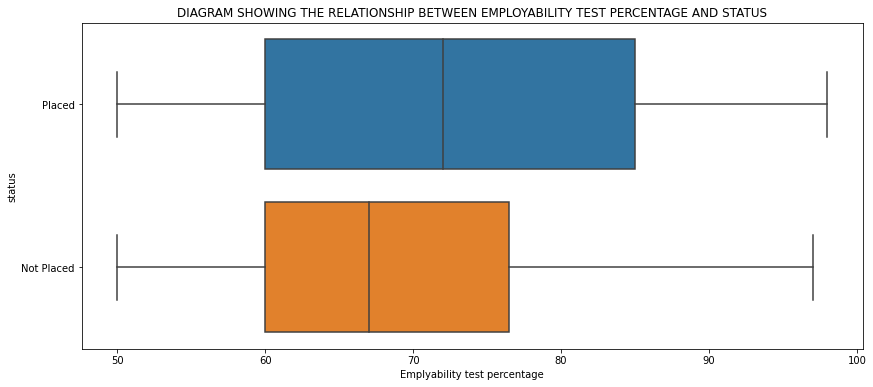

In [34]:
plt.figure(figsize = (14, 6))
sns.boxplot('etest_p', 'status', data = pment)
plt.xlabel("Emplyability test percentage")
plt.title("DIAGRAM SHOWING THE RELATIONSHIP BETWEEN EMPLOYABILITY TEST PERCENTAGE AND STATUS")
plt.show()

* The employability test percentage dosent affect the status much 

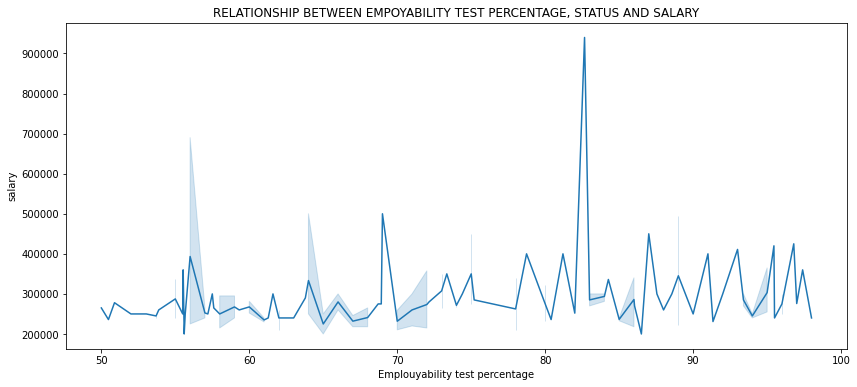

In [35]:
plt.figure(figsize = (14, 6))
sns.lineplot('etest_p', 'salary', data = pment)
plt.xlabel("Emplouyability test percentage")
plt.title("RELATIONSHIP BETWEEN EMPOYABILITY TEST PERCENTAGE, STATUS AND SALARY")
plt.show()

* It dosen't affect the salary of the students too

###MBA SPECIALISATION (specialisation) AND MBA PERCENTAGE (mba_p)

**HOW MBA PERCENTAGE AND MBA SPECIALISATION AFFECT SALARY AND STATUS**

MBA SPECIALISATION

In [36]:
pment['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

* 120 students had their MBA degree in Marketing and Finance 
* 95 of the students had their MBA degree in Marketing and Human Relations

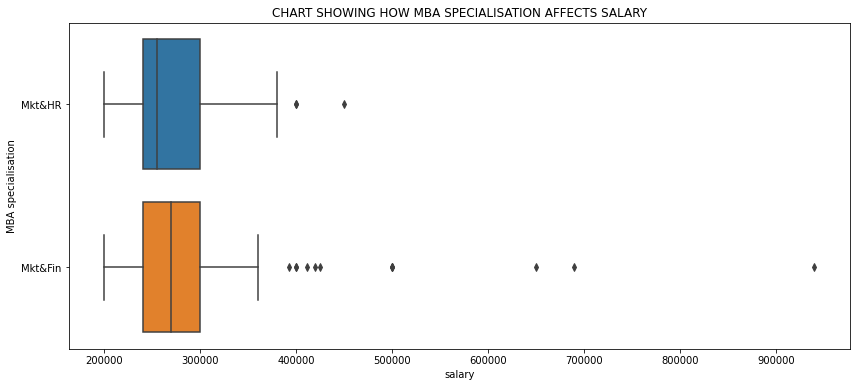

In [37]:
plt.figure(figsize = (14, 6))
sns.boxplot('salary', 'specialisation', data = pment)
plt.ylabel("MBA specialisation")
plt.title("CHART SHOWING HOW MBA SPECIALISATION AFFECTS SALARY")
plt.show()

* There is no significant relationship but studentsin Marketing and Human Relations got the highest paying jobs 

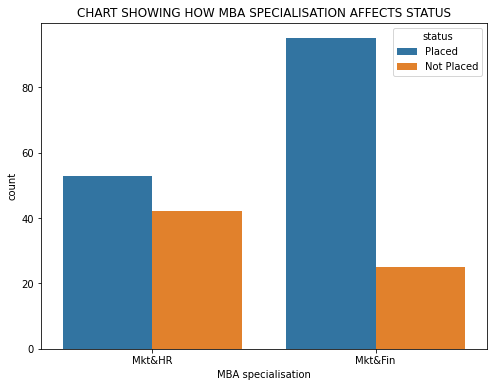

In [38]:
plt.figure(figsize = (8, 6))
sns.countplot('specialisation', hue = 'status', data = pment)
plt.xlabel("MBA specialisation")
plt.title("CHART SHOWING HOW MBA SPECIALISATION AFFECTS STATUS")
plt.show()

* Students who had their MBA degree in Marketing and Human Relations got placed faster 

MBA PERCENTAGE

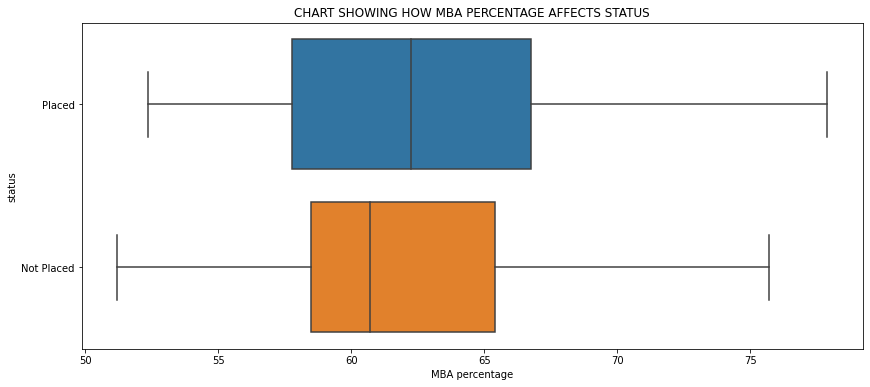

In [39]:
plt.figure(figsize = (14, 6))
sns.boxplot('mba_p', 'status', data = pment)
plt.xlabel("MBA percentage")
plt.title("CHART SHOWING HOW MBA PERCENTAGE AFFECTS STATUS")
plt.show()

* It doesn't affect it much 

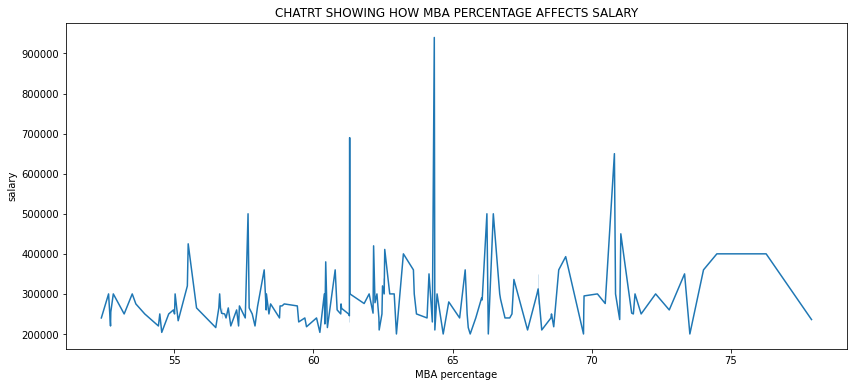

In [40]:
plt.figure(figsize = (14, 6))
sns.lineplot('mba_p', 'salary', data = pment)
plt.xlabel("MBA percentage")
plt.title("CHATRT SHOWING HOW MBA PERCENTAGE AFFECTS SALARY")
plt.show()

* MBA percentage doesn't affect the salary of students

# **THANK YOU FOR VIEWING MY PROJECT!!!**